# NYC Yellow Taxi Prediction

## Explorative Data Analysis


In [238]:
# NYC Taxi Fare Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Regression Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


# Clustering Data Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


# Classification 
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [179]:
# Change Display to view all columns
pd.set_option('display.max_columns', 500)

In [180]:
# Reading merged data
df_taxi = pd.read_csv('taxi_final.csv')
df_taxi.shape

(589308, 50)

In [181]:
df_taxi.head()

,VendorID,Pickup_Datetime,Dropoff_Datetime,PassengerCount,TripDistance,RateCodeID,StoreFwdFlag,PULocationID,DOLocationID,PaymentType,FareAmount,Extra,MTA_tax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,PUZone,PUBorough,pickup_longitude,pickup_latitude,DOZone,DOBorough,dropoff_longitude,dropoff_latitude,Date,Day,Month,Year,WeekdayName,Hour,Duration,Max,Min,Ave,Departure,HDD,CDD,Precipitation,New.Snow,Snow.Depth,morning_commute,wkday_mid-day,evening_commute,wkday_night,wkday_other,wkend_day,wkend_night,wkend_night_bar_close,Wkend_other
0,2,1/14/2017 22:11,1/14/2017 22:14,1,0.50,1,N,161,163,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30,Midtown Center,Manhattan,-73.977698,40.758028,Midtown North,Manhattan,-73.977569,40.764421,1/14/2017,14,1,2017,Saturday,22,180,34,28,31.0,-1.3,34,0,0.12,0.6,0.0,0,0,0,0,0,0,1,0,0
1,2,1/1/2017 1:41,1/1/2017 1:52,1,1.69,1,N,79,231,1,9.0,0.5,0.5,3.00,0.0,0.3,13.30,East Village,Manhattan,-73.985937,40.727620,TriBeCa/Civic Center,Manhattan,-74.007880,40.717773,1/1/2017,1,1,2017,Sunday,1,660,48,40,44.0,10.6,21,0,0.01,0.0,0.0,0,0,0,0,0,0,0,1,0
2,1,1/17/2017 12:03,1/17/2017 12:24,1,2.70,1,N,163,234,1,14.5,0.0,0.5,2.00,0.0,0.3,17.30,Midtown North,Manhattan,-73.977569,40.764421,Union Sq,Manhattan,-73.990458,40.740337,1/17/2017,17,1,2017,Tuesday,12,1260,42,38,40.0,7.8,25,0,0.35,0.0,0.0,0,1,0,0,0,0,0,0,0
3,2,1/17/2017 10:51,1/17/2017 10:55,1,0.57,1,N,236,263,1,4.5,0.0,0.5,1.06,0.0,0.3,6.36,Upper East Side North,Manhattan,-73.957012,40.780436,Yorkville West,Manhattan,-73.951010,40.778766,1/17/2017,17,1,2017,Tuesday,10,240,42,38,40.0,7.8,25,0,0.35,0.0,0.0,0,1,0,0,0,0,0,0,0
4,2,1/15/2017 23:39,1/15/2017 23:45,1,1.43,1,N,249,68,1,6.5,0.5,0.5,0.94,0.0,0.3,8.74,West Village,Manhattan,-74.002875,40.734576,East Chelsea,Manhattan,-73.999918,40.748427,1/15/2017,15,1,2017,Sunday,23,360,38,30,34.0,1.7,31,0,0.00,0.0,1.0,0,0,0,1,0,0,0,0,0


In [182]:
print(df_taxi.head(),"\n")
print("Summary Statistics: \n", df_taxi.describe(),"\n")
print("Missing Values in Data: \n",df_taxi.isna().sum(),"\n")

   VendorID  Pickup_Datetime Dropoff_Datetime  PassengerCount  TripDistance  \
0         2  1/14/2017 22:11  1/14/2017 22:14               1          0.50   
1         2    1/1/2017 1:41    1/1/2017 1:52               1          1.69   
2         1  1/17/2017 12:03  1/17/2017 12:24               1          2.70   
3         2  1/17/2017 10:51  1/17/2017 10:55               1          0.57   
4         2  1/15/2017 23:39  1/15/2017 23:45               1          1.43   

   RateCodeID StoreFwdFlag  PULocationID  DOLocationID  PaymentType  \
0           1            N           161           163            2   
1           1            N            79           231            1   
2           1            N           163           234            1   
3           1            N           236           263            1   
4           1            N           249            68            1   

   FareAmount  Extra  MTA_tax  TipAmount  TollsAmount  ImprovementSurcharge  \
0         4.0    0.

Missing Values in Data: 
 VendorID                 0
Pickup_Datetime          0
Dropoff_Datetime         0
PassengerCount           0
TripDistance             0
RateCodeID               0
StoreFwdFlag             0
PULocationID             0
DOLocationID             0
PaymentType              0
FareAmount               0
Extra                    0
MTA_tax                  0
TipAmount                0
TollsAmount              0
ImprovementSurcharge     0
TotalAmount              0
PUZone                   0
PUBorough                0
pickup_longitude         0
pickup_latitude          0
DOZone                   0
DOBorough                0
dropoff_longitude        0
dropoff_latitude         0
Date                     0
Day                      0
Month                    0
Year                     0
WeekdayName              0
Hour                     0
Duration                 0
Max                      0
Min                      0
Ave                      0
Departure                0
HD

### Distance and Fare Analysis

count    589308.000000
mean          2.919218
std           3.702045
min           0.000000
25%           0.980000
50%           1.600000
75%           3.000000
max          76.900000
Name: TripDistance, dtype: float64

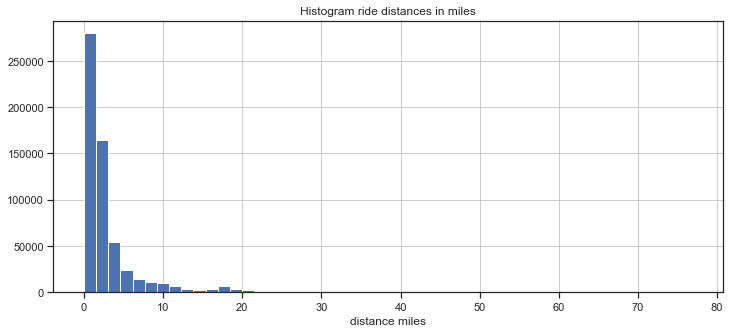

In [183]:
df_taxi.TripDistance.hist(bins=50, figsize=(12,5))
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')
df_taxi.TripDistance.describe()

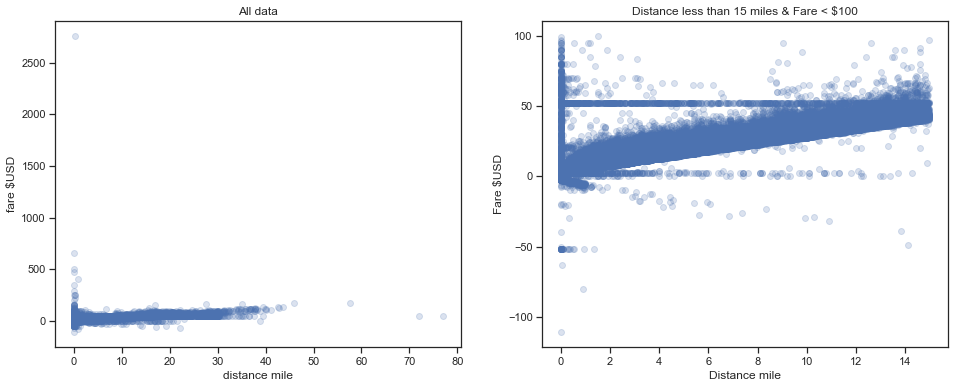

In [184]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df_taxi.TripDistance, df_taxi.FareAmount, alpha=0.2)
axs[0].set_xlabel('distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

# zoom in on part of data
idx = (df_taxi.TripDistance < 15) & (df_taxi.FareAmount < 100)
axs[1].scatter(df_taxi[idx].TripDistance, df_taxi[idx].FareAmount, alpha=0.2)
axs[1].set_xlabel('Distance mile')
axs[1].set_ylabel('Fare $USD')
axs[1].set_title('Distance less than 15 miles & Fare < $100');

#### Conclusions
    1. Some trips have zero distance but with a non-zero fare. This could be a trip to less than point 0.05 miles of pickup location. Information is on observation like this is limited, hence we cant predict
    2. There are some trips greater than 50miles, but has a low fare, indicating situation of discounted trips
    3. THe horizontal lines in the graph might indicate the fixed fare charges to JFK and other airports
    4. Overall, this a linear relationship between trip distance and fare, about $4/mile

## Dealing with Outliers and Non-Informative Values (Negative)

In [185]:
df_taxi[['FareAmount', 'Extra', 'MTA_tax','TipAmount', 'TollsAmount', 'ImprovementSurcharge', 'TotalAmount']].describe()

,FareAmount,Extra,MTA_tax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount
count,589308.000000,589308.00000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000
mean,12.723467,0.45507,0.497468,1.853476,0.327136,0.299449,16.387046
std,11.375257,0.72282,0.040703,2.470320,1.644009,0.017634,13.918324
min,-111.110000,-4.50000,-0.500000,-25.000000,-17.280000,-0.300000,-111.410000
25%,6.500000,0.00000,0.500000,0.000000,0.000000,0.300000,8.800000
50%,9.000000,0.00000,0.500000,1.450000,0.000000,0.300000,12.300000
75%,14.500000,0.50000,0.500000,2.460000,0.000000,0.300000,17.880000
max,2759.070000,7.00000,1.440000,200.000000,554.440000,0.300000,2759.370000


#### Replacing Negative Values with Zero in Continuous Variables

In [186]:
df_taxi['FareAmount'] = df_taxi['FareAmount'].clip(lower=0)
df_taxi['Extra'] = df_taxi['Extra'].clip(lower=0)
df_taxi['MTA_tax'] = df_taxi['MTA_tax'].clip(lower=0)
df_taxi['TipAmount'] = df_taxi['TipAmount'].clip(lower=0)
df_taxi['TollsAmount'] = df_taxi['TollsAmount'].clip(lower=0)
df_taxi['ImprovementSurcharge'] = df_taxi['ImprovementSurcharge'].clip(lower=0)
df_taxi['TotalAmount'] = df_taxi['TotalAmount'].clip(lower=0)

In [187]:
df_taxi.describe()

,VendorID,PassengerCount,TripDistance,RateCodeID,PULocationID,DOLocationID,PaymentType,FareAmount,Extra,MTA_tax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Day,Month,Year,Hour,Duration,Max,Min,Ave,Departure,HDD,CDD,Precipitation,New.Snow,Snow.Depth,morning_commute,wkday_mid-day,evening_commute,wkday_night,wkday_other,wkend_day,wkend_night,wkend_night_bar_close,Wkend_other
count,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000,589308.000000
mean,1.585572,1.608502,2.919218,1.037732,161.025515,158.968843,1.324397,12.731155,0.455350,0.497861,1.853566,0.327207,0.299693,16.396346,-73.972205,40.751936,-73.973100,40.752973,5.141379,5.902226,2017.800561,13.356275,1006.033212,63.702203,48.866016,56.284109,2.462789,12.392649,3.915338,0.125447,0.111601,0.117320,0.110365,0.219152,0.123993,0.164142,0.077404,0.151160,0.084440,0.044111,0.025233
std,0.511045,1.251166,3.702045,0.265949,65.948702,69.846951,0.488499,11.355392,0.722389,0.032701,2.469864,1.643765,0.009599,13.896503,0.039511,0.028901,0.034922,0.031767,6.635636,3.395874,0.748552,6.269214,3817.415826,19.339685,17.982802,18.483545,8.315668,14.358165,6.330365,0.277622,0.819511,0.734118,0.313344,0.413672,0.329574,0.370404,0.267232,0.358205,0.278046,0.205342,0.156832
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-74.174002,40.551862,-74.233535,40.525491,1.000000,1.000000,2017.000000,0.000000,-3360.000000,14.000000,2.000000,9.000000,-24.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.980000,1.000000,114.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.800000,-73.990896,40.736824,-73.990458,40.736824,2.000000,3.000000,2017.000000,9.000000,360.000000,48.000000,36.000000,41.500000,-1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.600000,1.000000,161.000000,161.000000,1.000000,9.000000,0.000000,0.500000,1.450000,0.000000,0.300000,12.300000,-73.978632,40.756688,-73.978492,40.756688,3.000000,6.000000,2018.000000,14.000000,660.000000,68.000000,50.000000,59.000000,2.700000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,3.000000,1.000000,231.000000,232.000000,2.000000,14.500000,0.500000,0.500000,2.460000,0.000000,0.300000,17.880000,-73.965635,40.768615,-73.965146,40.771570,4.000000,9.000000,2018.000000,18.000000,1080.000000,80.000000,64.000000,71.000000,7.200000,23.000000,6.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,9.000000,76.900000,6.000000,263.000000,263.000000,4.000000,2759.070000,7.000000,1.440000,200.000000,554.440000,0.300000,2759.370000,-73.711025,40.899528,-73.711025,40.899528,31.000000,12.000000,2019.000000,23.000000,86400.000000,96.000000,79.000000,87.500000,23.900000,56.000000,23.000000,1.860000,9.800000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dealing with Outliers 

In [188]:
Q1 = df_taxi[['FareAmount', 'Extra', 'MTA_tax','TipAmount', 'TollsAmount', 'ImprovementSurcharge', 'TotalAmount']].quantile(0.25)
Q3 = df_taxi[['FareAmount', 'Extra', 'MTA_tax','TipAmount', 'TollsAmount', 'ImprovementSurcharge', 'TotalAmount']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

FareAmount              8.00
Extra                   0.50
MTA_tax                 0.00
TipAmount               2.46
TollsAmount             0.00
ImprovementSurcharge    0.00
TotalAmount             9.08
dtype: float64


In [189]:
df = df_taxi[~((df_taxi[['FareAmount', 'TotalAmount']] < (Q1 - 1.5 * IQR)) | (df_taxi[['FareAmount', 'TotalAmount']] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(530679, 50)

### Descriptive Descriptive
    1. Univariate Distribution
    2. Bivariate Distribution

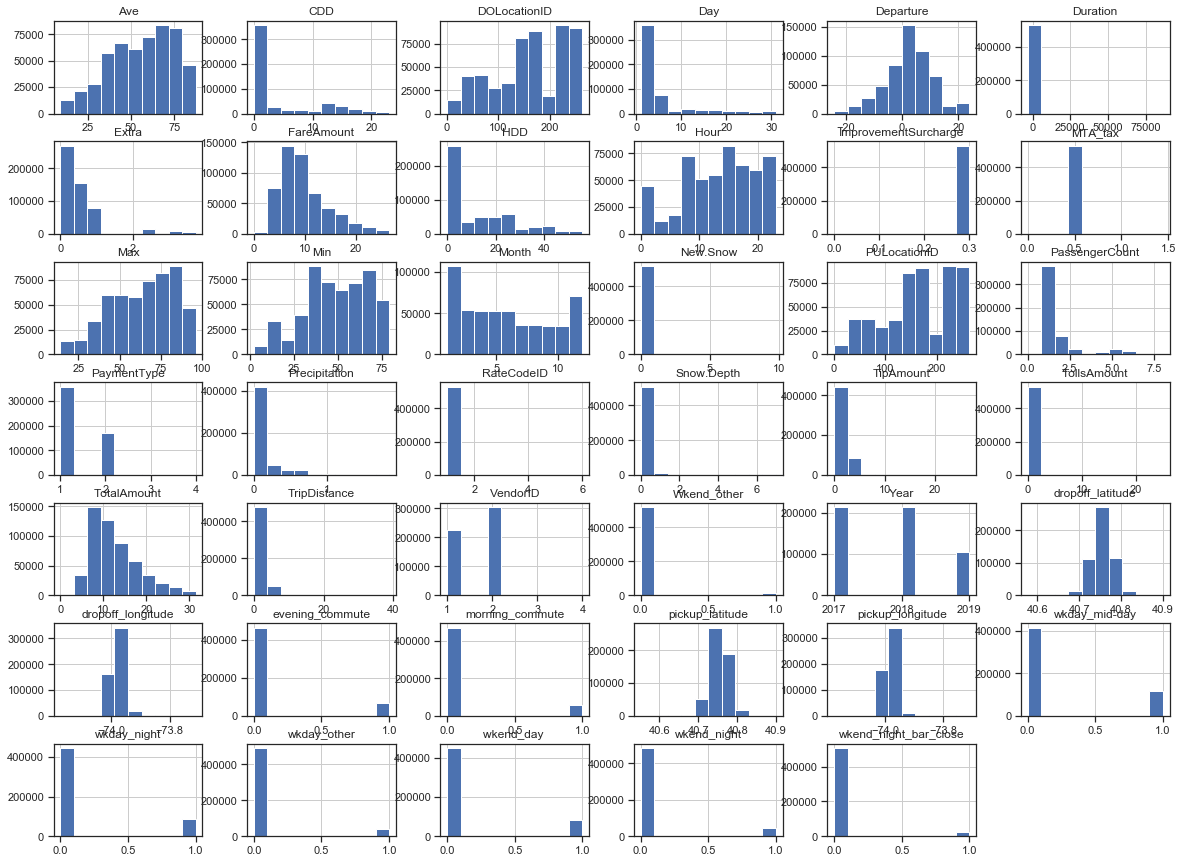

In [190]:
#1
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")].index.values].hist(figsize=[20,15])
plt.show()

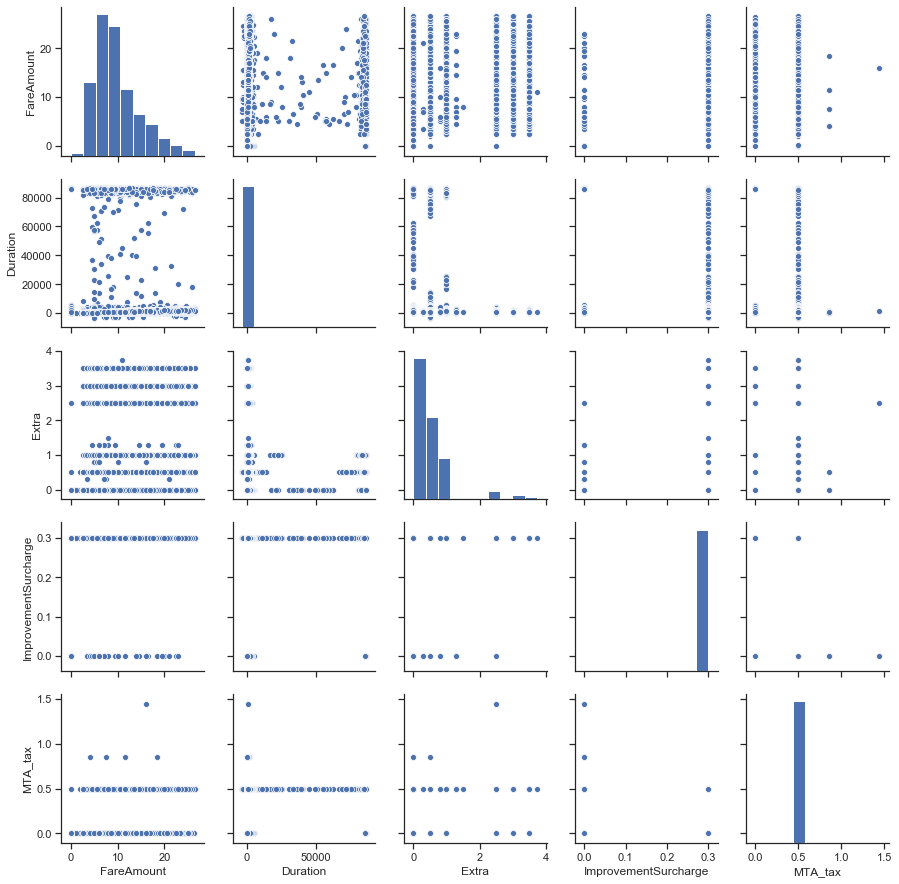

In [191]:
#2
sns.pairplot(df, vars=['FareAmount', 'Duration','Extra','ImprovementSurcharge', 'MTA_tax'])

### Distribution of Fare Amount and Tips

In [192]:
print("Passenger Count Against Mean of Distance & Fare", df.groupby('PassengerCount')['TripDistance', 'FareAmount'].mean())
print("\n Average FareAmount $USD/Mile : {:0.2f}".format(df.FareAmount.sum()/df.TripDistance.sum()))
print("\n Average TotalAmount $USD/Mile : {:0.2f}".format(df.TotalAmount.sum()/df.TripDistance.sum()))

Passenger Count Against Mean of Distance & Fare                 TripDistance  FareAmount
PassengerCount                          
0                   1.759750    9.528971
1                   1.894584    9.730505
2                   1.946596    9.937110
3                   1.958783    9.988382
4                   1.993604   10.118587
5                   1.938705    9.788125
6                   1.903688    9.698461
8                   0.010000    8.800000

 Average FareAmount $USD/Mile : 5.13

 Average TotalAmount $USD/Mile : 6.64


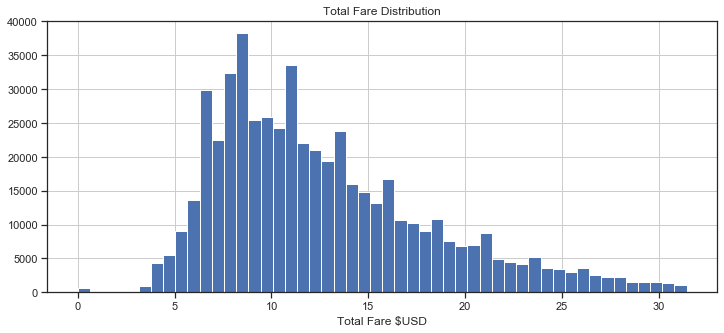

In [193]:
df[df.TotalAmount<200].TotalAmount.hist(bins=50, figsize=(12,5))
plt.xlabel('Total Fare $USD')
plt.title('Total Fare Distribution');

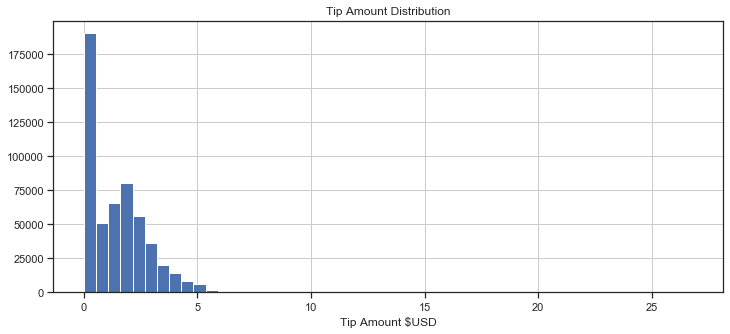

In [194]:
df.TipAmount.hist(bins=50, figsize=(12,5))
plt.xlabel('Tip Amount $USD')
plt.title('Tip Amount Distribution');

### Histograms for String Variables 

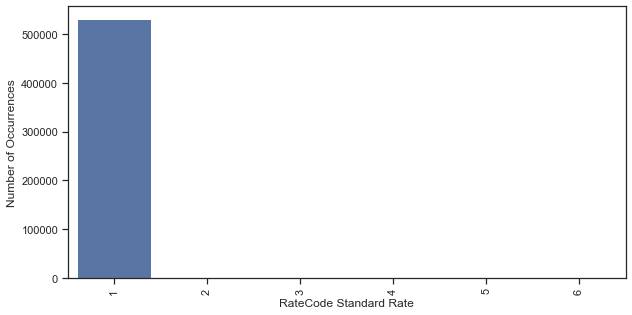

In [195]:
# Histogram for RateCode Standard Rate and Cash Dominates out of the RateCodes
cnt_RateCodeID = df['RateCodeID'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(cnt_RateCodeID.index, cnt_RateCodeID.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('RateCode Standard Rate', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()


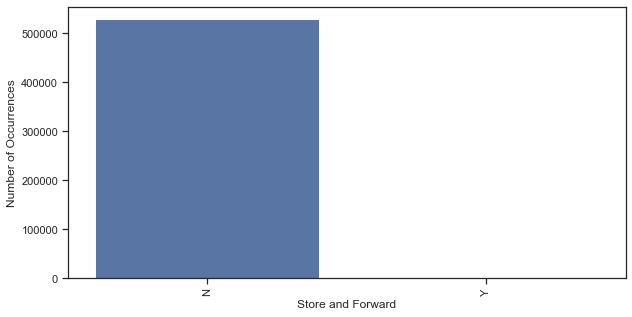

In [196]:
# Histogram for RateCode Standard Rate and Cash Dominates out of the RateCodes
cnt_StoreFwdFlag = df['StoreFwdFlag'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(cnt_StoreFwdFlag.index, cnt_StoreFwdFlag.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Store and Forward', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

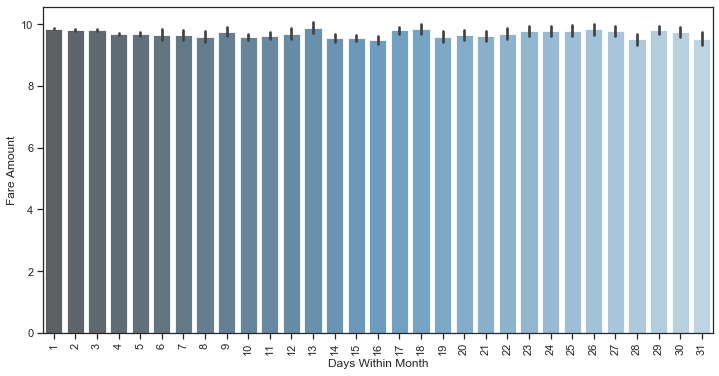

In [197]:
# Day Against Weekly Sales
plt.figure(figsize=(12,6))
sns.barplot(df['Day'], df['FareAmount'], alpha=0.8, palette='Blues_d')
plt.xticks(rotation='vertical')
plt.xlabel('Days Within Month', fontsize=12)
plt.ylabel('Fare Amount', fontsize=12)
plt.show()

In [198]:
print("Unique Characters in VendorID Column: \n", df['VendorID'].unique())
print("Unique Characters in RateCodeID Column: \n", df['RateCodeID'].unique())
print("Unique Characters in Store and Forward Flag: \n", df['StoreFwdFlag'].unique())
print("Unique Characters in PaymentType: \n", df['PaymentType'].unique())
print("Unique Characters in Month Column: \n", df['Month'].unique())
print("Unique Characters in Year Column: \n", df['Year'].unique())
print("Unique Characters in WeekdayName: \n", df['WeekdayName'].unique())

Unique Characters in VendorID Column: 
 [2 1 4]
Unique Characters in RateCodeID Column: 
 [1 5 3 6 4 2]
Unique Characters in Store and Forward Flag: 
 ['N' 'Y']
Unique Characters in PaymentType: 
 [2 1 3 4]
Unique Characters in Month Column: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique Characters in Year Column: 
 [2017 2018 2019]
Unique Characters in WeekdayName: 
 ['Saturday' 'Sunday' 'Tuesday' 'Monday' 'Wednesday' 'Friday' 'Thursday']


In [199]:
# Binary Label Encoding
le = preprocessing.LabelEncoder()
df['StoreFwdFlag'] = le.fit_transform(df['StoreFwdFlag'])
df['VendorID'] = le.fit_transform(df['VendorID'])
df['Year'] = le.fit_transform(df['Year'])

df = pd.get_dummies(df, columns=['RateCodeID', 'PaymentType', 'WeekdayName','Month'])
df.head()

C:\Users\sylve\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sylve\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sylve\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,VendorID,Pickup_Datetime,Dropoff_Datetime,PassengerCount,TripDistance,StoreFwdFlag,PULocationID,DOLocationID,FareAmount,Extra,MTA_tax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,PUZone,PUBorough,pickup_longitude,pickup_latitude,DOZone,DOBorough,dropoff_longitude,dropoff_latitude,Date,Day,Year,Hour,Duration,Max,Min,Ave,Departure,HDD,CDD,Precipitation,New.Snow,Snow.Depth,morning_commute,wkday_mid-day,evening_commute,wkday_night,wkday_other,wkend_day,wkend_night,wkend_night_bar_close,Wkend_other,RateCodeID_1,RateCodeID_2,RateCodeID_3,RateCodeID_4,RateCodeID_5,RateCodeID_6,PaymentType_1,PaymentType_2,PaymentType_3,PaymentType_4,WeekdayName_Friday,WeekdayName_Monday,WeekdayName_Saturday,WeekdayName_Sunday,WeekdayName_Thursday,WeekdayName_Tuesday,WeekdayName_Wednesday,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,1/14/2017 22:11,1/14/2017 22:14,1,0.50,0,161,163,4.0,0.5,0.5,0.00,0.0,0.3,5.30,Midtown Center,Manhattan,-73.977698,40.758028,Midtown North,Manhattan,-73.977569,40.764421,1/14/2017,14,0,22,180,34,28,31.0,-1.3,34,0,0.12,0.6,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1/1/2017 1:41,1/1/2017 1:52,1,1.69,0,79,231,9.0,0.5,0.5,3.00,0.0,0.3,13.30,East Village,Manhattan,-73.985937,40.727620,TriBeCa/Civic Center,Manhattan,-74.007880,40.717773,1/1/2017,1,0,1,660,48,40,44.0,10.6,21,0,0.01,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1/17/2017 12:03,1/17/2017 12:24,1,2.70,0,163,234,14.5,0.0,0.5,2.00,0.0,0.3,17.30,Midtown North,Manhattan,-73.977569,40.764421,Union Sq,Manhattan,-73.990458,40.740337,1/17/2017,17,0,12,1260,42,38,40.0,7.8,25,0,0.35,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1/17/2017 10:51,1/17/2017 10:55,1,0.57,0,236,263,4.5,0.0,0.5,1.06,0.0,0.3,6.36,Upper East Side North,Manhattan,-73.957012,40.780436,Yorkville West,Manhattan,-73.951010,40.778766,1/17/2017,17,0,10,240,42,38,40.0,7.8,25,0,0.35,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1/15/2017 23:39,1/15/2017 23:45,1,1.43,0,249,68,6.5,0.5,0.5,0.94,0.0,0.3,8.74,West Village,Manhattan,-74.002875,40.734576,East Chelsea,Manhattan,-73.999918,40.748427,1/15/2017,15,0,23,360,38,30,34.0,1.7,31,0,0.00,0.0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Some Geographic Representation of Data

In [200]:
# minimum and maximum longitude test set
min(df.pickup_longitude.min(), df.dropoff_longitude.min()), \
max(df.pickup_longitude.max(), df.dropoff_longitude.max())



(-74.17400157, -73.71102543)

In [201]:
# minimum and maximum longitude test set
min(df.pickup_latitude .min(), df.dropoff_latitude.min()), \
max(df. pickup_latitude .max(), df.dropoff_latitude.max())


(40.55186203, 40.89952838)

In [202]:
## this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.5, -72.8, 40.5, 41.8)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [203]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

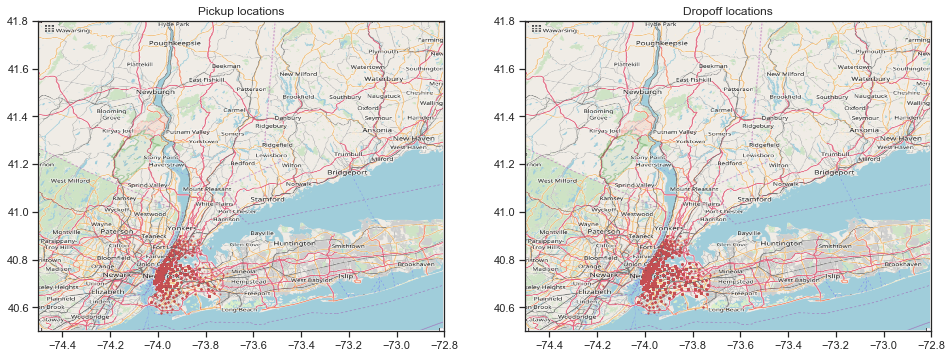

In [204]:
# plot Data points on google map
plot_on_map(df, BB, nyc_map, s=1, alpha=0.3)


##  Feature Selection 

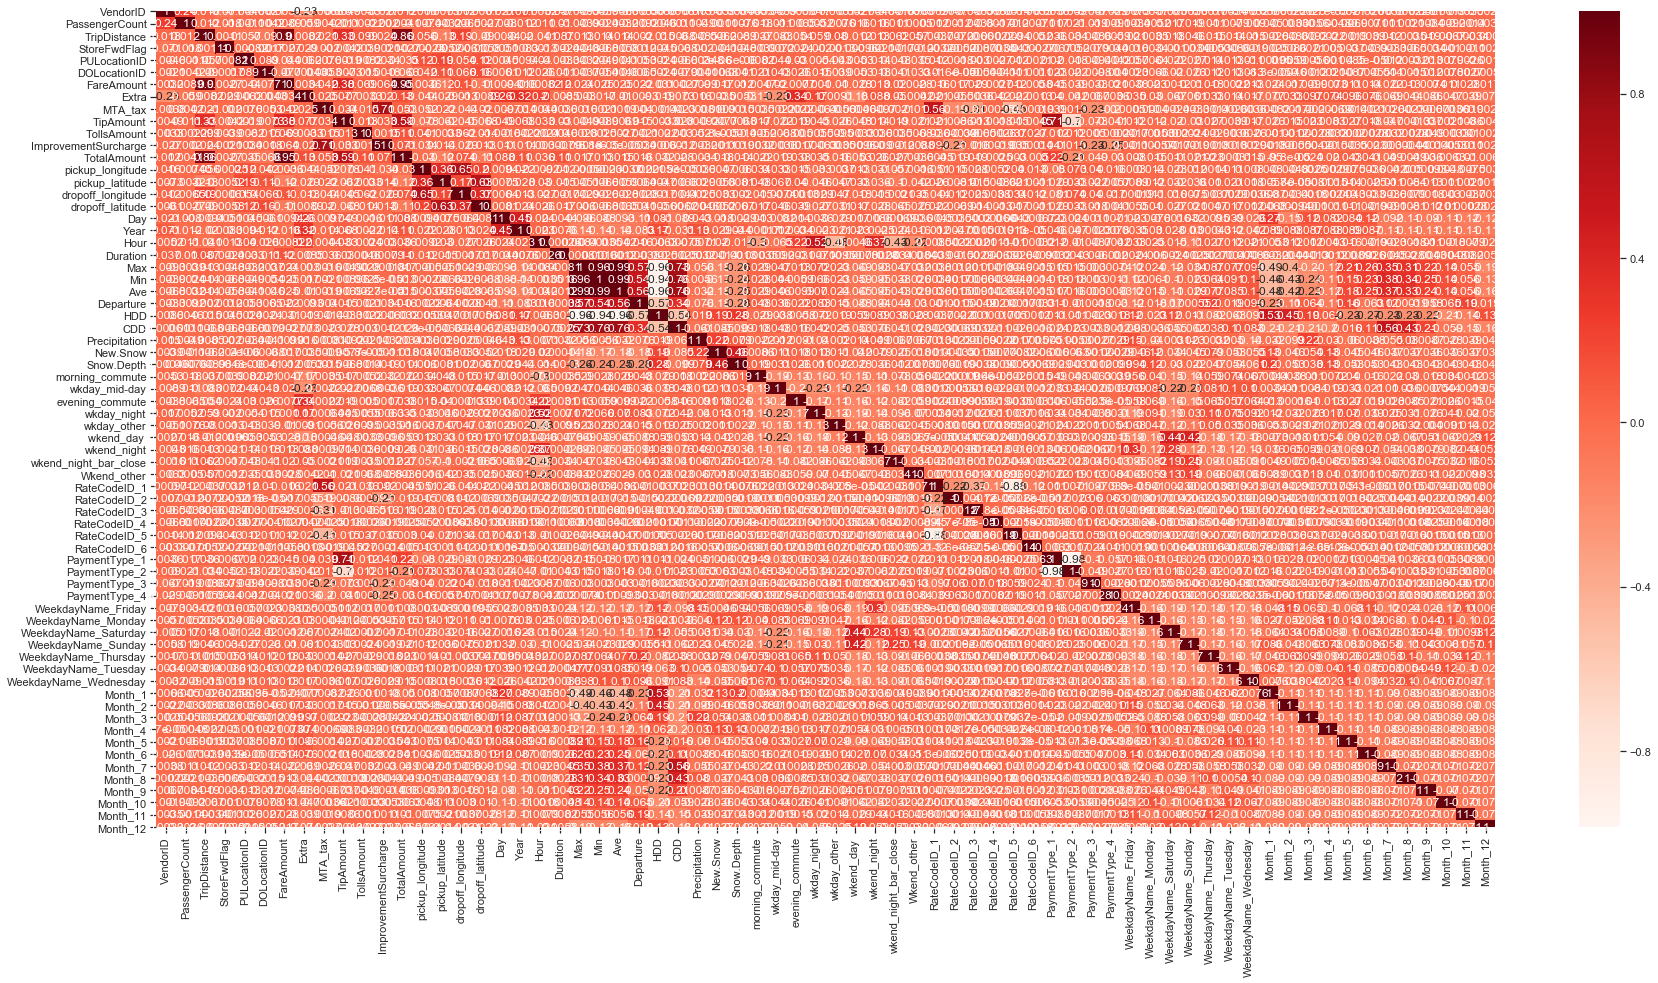

In [205]:
plt.figure(figsize=(30,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [206]:
# Correlation with output variable
cor_target = abs(cor['TotalAmount'])

#Ideally, we want low correlation btw independent variables;
#High correlation btw independent variables and dependent variables
relevant_features = cor_target[cor_target>0.5]
relevant_features

TripDistance    0.856174
FareAmount      0.952489
TipAmount       0.591140
TotalAmount     1.000000
Name: TotalAmount, dtype: float64

#### FIndings
    1.Distance travelled has the highest correlation with Total Amount
    2.Fare Amount and Tip Amount has a considerable impact on the final amount paid by riders.

### Embedded Feature Selection

In [207]:
X = df.drop(columns=['Pickup_Datetime', 'Dropoff_Datetime','PUZone', 'PUBorough','pickup_longitude', 'pickup_latitude',
                            'DOZone', 'DOBorough','dropoff_longitude', 'dropoff_latitude', 'Date','TotalAmount', 'FareAmount'])
y = df['TotalAmount']

In [208]:
reg = LassoCV(cv=5, random_state=1)
reg = reg.fit(X,y)
print("Best alpha Using Built-in LassoCV: %f" % reg.alpha_)
print("Best Score Using Built-in LassoCV: %f" % reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha Using Built-in LassoCV: 2.234912
Best Score Using Built-in LassoCV: 0.719559


Text(0.5, 1.0, 'Feature Importance Using Lasso Model')

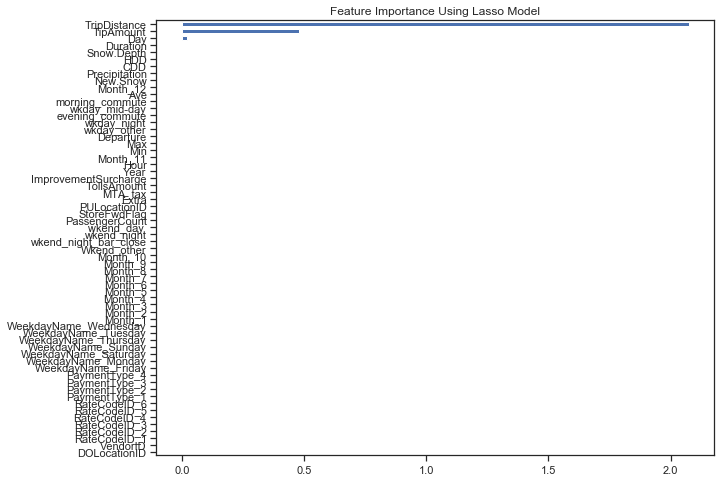

In [209]:
imp_coef = coef.sort_values()
plt.rcParams["figure.figsize"] = (10, 8)
imp_coef.plot(kind="barh")
plt.title("Feature Importance Using Lasso Model")

## Supervised Learning
    1. Multiple Regression
    2. Extra Tree Regression
    3. XGBoost Regression

#### There High Multicollinearity between Trip distance and Fare Amount, thus we have to drop one variable

### First Model Run

In [211]:
X = df.drop(columns=['Pickup_Datetime', 'Dropoff_Datetime','PUZone', 'PUBorough','pickup_longitude', 'pickup_latitude',
                            'DOZone', 'DOBorough','dropoff_longitude', 'dropoff_latitude', 'Date','TotalAmount', 'FareAmount'])
y = df['TotalAmount']

In [212]:
print(X.shape, y.shape)

(530679, 62) (530679,)


In [218]:
# After data preprocessing, we will split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [219]:
# Regression Model classifiers
lr = LinearRegression()
etr = ExtraTreesRegressor(n_estimators=10,max_features='auto', verbose=1)
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
xgb = ensemble.GradientBoostingRegressor(**params)

In [220]:
# Using simple split and test
print("Linear Regression")
lr = lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)
print("MSE for LR: %.2f" %mean_squared_error(y_test,y_predlr))
print("R2 score:%.2f"%r2_score(y_test,y_predlr))


print("\n" "ExtraTreesRegressor:")
etr  = etr.fit(X_train,y_train)
y_predetr = etr.predict(X_test)
print("MSE for ETR: %.2f" %mean_squared_error(y_test,y_predetr))
print("R2 score:%.2f"%r2_score(y_test,y_predetr))


print("\n" "XGBoost:")
xgb  = xgb.fit(X_train,y_train)
y_predxgb = xgb.predict(X_test)
print("MSE for XGB: %.2f" %mean_squared_error(y_test,y_predxgb))
print("R2 score:%.2f"%r2_score(y_test,y_predetr))

Linear Regression
MSE for LR: 4.81
R2 score:0.85

ExtraTreesRegressor:


C:\Users\sylve\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
C:\Users\sylve\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE for ETR: 3.09
R2 score:0.90

XGBoost:
MSE for XGB: 7.75
R2 score:0.90


In [239]:
# regression coefficients 
print('Coefficients: \n', np.around(lr.coef_, decimals=3))

Coefficients: 
 [[2.878 1.384 0.665 0.066]]


### 2nd Model Run

In [222]:
X = np.array(df[['TripDistance', 'TipAmount', 'TollsAmount','Day']].values)
y = np.array(df[['TotalAmount']].values)

In [223]:
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

(530679, 4) (530679, 1)


In [224]:
# Using simple split and test
print("Linear Regression")
lr = lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)
print("MSE for LR: %.2f" %mean_squared_error(y_test,y_predlr))
print("R2 score:%.2f"%r2_score(y_test,y_predlr))


print("\n" "ExtraTreesRegressor:")
etr  = etr.fit(X_train,y_train)
y_predetr = etr.predict(X_test)
print("MSE for ETR: %.2f" %mean_squared_error(y_test,y_predetr))
print("R2 score:%.2f"%r2_score(y_test,y_predetr))


print("\n" "XGBoost:")
xgb  = xgb.fit(X_train,y_train)
y_predxgb = xgb.predict(X_test)
print("MSE for XGB: %.2f" %mean_squared_error(y_test,y_predxgb))
print("R2 score:%.2f"%r2_score(y_test,y_predetr))

Linear Regression
MSE for LR: 4.81
R2 score:0.85

ExtraTreesRegressor:


C:\Users\sylve\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
C:\Users\sylve\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE for ETR: 3.08
R2 score:0.90

XGBoost:
MSE for XGB: 7.75
R2 score:0.90


In [225]:
# regression coefficients 
print('Coefficients: \n', np.around(lr.coef_, decimals=3))

Coefficients: 
 [[2.878 1.384 0.665 0.066]]


# Unsupervised Learning - Clustering

In [226]:
cluster_data = df[['PassengerCount','TripDistance','FareAmount', 'Extra', 'MTA_tax', 'TipAmount', 'TollsAmount',
       'ImprovementSurcharge', 'TotalAmount', 'Duration']]

In [227]:
cluster_data.head()

,PassengerCount,TripDistance,FareAmount,Extra,MTA_tax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,Duration
0,1,0.50,4.0,0.5,0.5,0.00,0.0,0.3,5.30,180
1,1,1.69,9.0,0.5,0.5,3.00,0.0,0.3,13.30,660
2,1,2.70,14.5,0.0,0.5,2.00,0.0,0.3,17.30,1260
3,1,0.57,4.5,0.0,0.5,1.06,0.0,0.3,6.36,240
4,1,1.43,6.5,0.5,0.5,0.94,0.0,0.3,8.74,360


In [228]:
mms = MinMaxScaler()
mms.fit(cluster_data)
data_transformed = mms.transform(cluster_data)

C:\Users\sylve\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


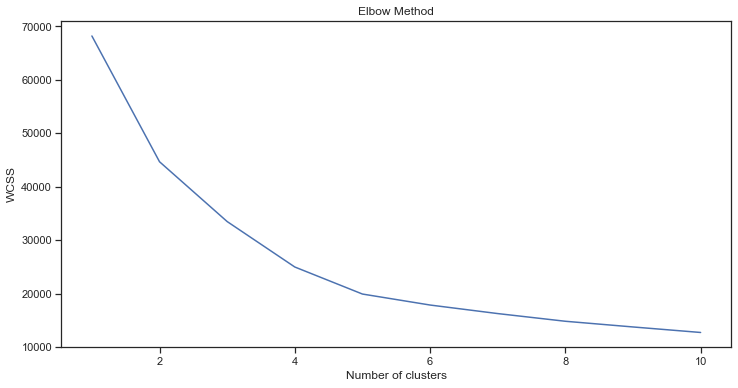

In [229]:
plt.figure(figsize=(12,6))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Optimal Number of Clusters are between 4-6 clusters. Four is much better

In [230]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=1)

In [231]:
y_predicted = kmeans.fit_predict(data_transformed)

In [232]:
cluster_data['cluster'] = y_predicted

C:\Users\sylve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [233]:
# Checks if cluster labels attached to dataset
cluster_data.head()

,PassengerCount,TripDistance,FareAmount,Extra,MTA_tax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,Duration,cluster
0,1,0.50,4.0,0.5,0.5,0.00,0.0,0.3,5.30,180,0
1,1,1.69,9.0,0.5,0.5,3.00,0.0,0.3,13.30,660,2
2,1,2.70,14.5,0.0,0.5,2.00,0.0,0.3,17.30,1260,2
3,1,0.57,4.5,0.0,0.5,1.06,0.0,0.3,6.36,240,0
4,1,1.43,6.5,0.5,0.5,0.94,0.0,0.3,8.74,360,0


### Principal Component Analysis 

In [234]:
# We use the standardize data we used for clustering for PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_transformed)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2'])

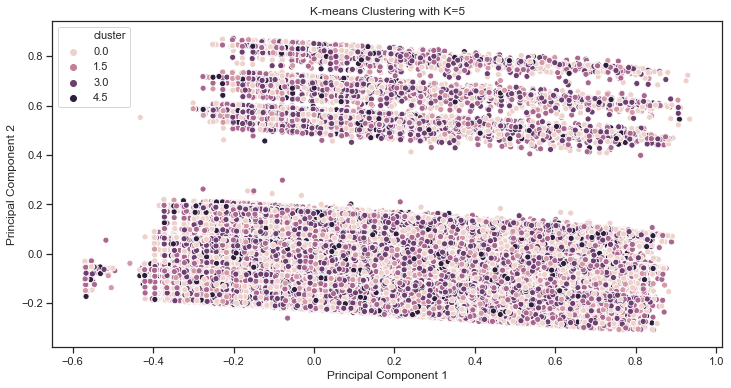

In [235]:
# Plotting the space dimensions
plt.figure(figsize=(12,6))
sns.scatterplot(x="pca1", y="pca2", hue=cluster_data['cluster'], data=principalDf)
plt.title('K-means Clustering with K=5')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.show()

In [236]:
principalDf.head()

,pca1,pca2
0,-0.322987,0.057941
1,-0.000216,0.032878
2,0.218686,-0.126101
3,-0.295421,-0.074696
4,-0.174958,0.045049


#### Explained Ratio

In [237]:
pca.explained_variance_ratio_

array([0.50441551, 0.25734025])

## Classification

In [240]:
df = pd.get_dummies(df, columns=['PUBorough'])

In [241]:
df.head()

,VendorID,Pickup_Datetime,Dropoff_Datetime,PassengerCount,TripDistance,StoreFwdFlag,PULocationID,DOLocationID,FareAmount,Extra,MTA_tax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,PUZone,pickup_longitude,pickup_latitude,DOZone,DOBorough,dropoff_longitude,dropoff_latitude,Date,Day,Year,Hour,Duration,Max,Min,Ave,Departure,HDD,CDD,Precipitation,New.Snow,Snow.Depth,morning_commute,wkday_mid-day,evening_commute,wkday_night,wkday_other,wkend_day,wkend_night,wkend_night_bar_close,Wkend_other,RateCodeID_1,RateCodeID_2,RateCodeID_3,RateCodeID_4,RateCodeID_5,RateCodeID_6,PaymentType_1,PaymentType_2,PaymentType_3,PaymentType_4,WeekdayName_Friday,WeekdayName_Monday,WeekdayName_Saturday,WeekdayName_Sunday,WeekdayName_Thursday,WeekdayName_Tuesday,WeekdayName_Wednesday,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,PUBorough_Bronx,PUBorough_Brooklyn,PUBorough_EWR,PUBorough_Manhattan,PUBorough_Queens,PUBorough_Staten Island
0,1,1/14/2017 22:11,1/14/2017 22:14,1,0.50,0,161,163,4.0,0.5,0.5,0.00,0.0,0.3,5.30,Midtown Center,-73.977698,40.758028,Midtown North,Manhattan,-73.977569,40.764421,1/14/2017,14,0,22,180,34,28,31.0,-1.3,34,0,0.12,0.6,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1/1/2017 1:41,1/1/2017 1:52,1,1.69,0,79,231,9.0,0.5,0.5,3.00,0.0,0.3,13.30,East Village,-73.985937,40.727620,TriBeCa/Civic Center,Manhattan,-74.007880,40.717773,1/1/2017,1,0,1,660,48,40,44.0,10.6,21,0,0.01,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1/17/2017 12:03,1/17/2017 12:24,1,2.70,0,163,234,14.5,0.0,0.5,2.00,0.0,0.3,17.30,Midtown North,-73.977569,40.764421,Union Sq,Manhattan,-73.990458,40.740337,1/17/2017,17,0,12,1260,42,38,40.0,7.8,25,0,0.35,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1/17/2017 10:51,1/17/2017 10:55,1,0.57,0,236,263,4.5,0.0,0.5,1.06,0.0,0.3,6.36,Upper East Side North,-73.957012,40.780436,Yorkville West,Manhattan,-73.951010,40.778766,1/17/2017,17,0,10,240,42,38,40.0,7.8,25,0,0.35,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1/15/2017 23:39,1/15/2017 23:45,1,1.43,0,249,68,6.5,0.5,0.5,0.94,0.0,0.3,8.74,West Village,-74.002875,40.734576,East Chelsea,Manhattan,-73.999918,40.748427,1/15/2017,15,0,23,360,38,30,34.0,1.7,31,0,0.00,0.0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [251]:
df.columns

Index(['VendorID', 'Pickup_Datetime', 'Dropoff_Datetime', 'PassengerCount',
       'TripDistance', 'StoreFwdFlag', 'PULocationID', 'DOLocationID',
       'FareAmount', 'Extra', 'MTA_tax', 'TipAmount', 'TollsAmount',
       'ImprovementSurcharge', 'TotalAmount', 'PUZone', 'pickup_longitude',
       'pickup_latitude', 'DOZone', 'DOBorough', 'dropoff_longitude',
       'dropoff_latitude', 'Date', 'Day', 'Year', 'Hour', 'Duration', 'Max',
       'Min', 'Ave', 'Departure', 'HDD', 'CDD', 'Precipitation', 'New.Snow',
       'Snow.Depth', 'morning_commute', 'wkday_mid-day', 'evening_commute',
       'wkday_night', 'wkday_other', 'wkend_day ', 'wkend_night',
       'wkend_night_bar_close', 'Wkend_other', 'RateCodeID_1', 'RateCodeID_2',
       'RateCodeID_3', 'RateCodeID_4', 'RateCodeID_5', 'RateCodeID_6',
       'PaymentType_1', 'PaymentType_2', 'PaymentType_3', 'PaymentType_4',
       'WeekdayName_Friday', 'WeekdayName_Monday', 'WeekdayName_Saturday',
       'WeekdayName_Sunday', 'WeekdayName_

In [319]:
#It contains no information, since it was recently implemented
X= df.drop(columns=['Pickup_Datetime', 'Dropoff_Datetime', 'PassengerCount',
       'TripDistance', 'StoreFwdFlag', 'PULocationID', 'DOLocationID', 'FareAmount', 'Extra', 
        'MTA_tax', 'TipAmount', 'TollsAmount','ImprovementSurcharge', 'TotalAmount', 'PUZone', 'pickup_longitude',
        'pickup_latitude', 'DOZone', 'DOBorough', 'dropoff_longitude','dropoff_latitude', 'Date', 'Duration', 'Max',
        'Min', 'Ave', 'Departure', 'HDD', 'CDD', 'Precipitation', 'New.Snow','Snow.Depth','RateCodeID_1', 'RateCodeID_2',
        'RateCodeID_3', 'RateCodeID_4', 'RateCodeID_5', 'RateCodeID_6', 'VendorID','Day', 'Year'])

y = df[['RateCodeID_2']]

In [320]:
X.head()

,Hour,morning_commute,wkday_mid-day,evening_commute,wkday_night,wkday_other,wkend_day,wkend_night,wkend_night_bar_close,Wkend_other,PaymentType_1,PaymentType_2,PaymentType_3,PaymentType_4,WeekdayName_Friday,WeekdayName_Monday,WeekdayName_Saturday,WeekdayName_Sunday,WeekdayName_Thursday,WeekdayName_Tuesday,WeekdayName_Wednesday,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,PUBorough_Bronx,PUBorough_Brooklyn,PUBorough_EWR,PUBorough_Manhattan,PUBorough_Queens,PUBorough_Staten Island
0,22,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,12,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,23,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [326]:
X.columns

Index(['Hour', 'morning_commute', 'wkday_mid-day', 'evening_commute',
       'wkday_night', 'wkday_other', 'wkend_day ', 'wkend_night',
       'wkend_night_bar_close', 'Wkend_other', 'PaymentType_1',
       'PaymentType_2', 'PaymentType_3', 'PaymentType_4', 'WeekdayName_Friday',
       'WeekdayName_Monday', 'WeekdayName_Saturday', 'WeekdayName_Sunday',
       'WeekdayName_Thursday', 'WeekdayName_Tuesday', 'WeekdayName_Wednesday',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'PUBorough_Bronx', 'PUBorough_Brooklyn', 'PUBorough_EWR',
       'PUBorough_Manhattan', 'PUBorough_Queens', 'PUBorough_Staten Island'],
      dtype='object')

In [321]:
#Split Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [322]:
#initialize your classifier
print("Naive-Bayes Classifier")
nb = BernoulliNB()

#fit your classifier to training set
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Precision: %0.2f" %precision_score(y_test, y_pred , average="macro"))
print("Recall:  %0.2f" %recall_score(y_test, y_pred , average="macro"))
print("F1-score:  %0.2f" %f1_score(y_test, y_pred , average="macro"))

Naive-Bayes Classifier


C:\Users\sylve\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[159115     77]
 [    11      1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    159192
           1       0.01      0.08      0.02        12

   micro avg       1.00      1.00      1.00    159204
   macro avg       0.51      0.54      0.51    159204
weighted avg       1.00      1.00      1.00    159204

Precision: 0.51
Recall:  0.54
F1-score:  0.51


In [323]:
y.shape

(530679, 1)

In [324]:
print("Decision Tree Classifier")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Precision: %0.2f" %precision_score(y_test, y_pred , average="macro"))
print("Recall:  %0.2f" %recall_score(y_test, y_pred , average="macro"))
print("F1-score:  %0.2f" %f1_score(y_test, y_pred , average="macro"))

Decision Tree Classifier
[[159187      5]
 [    11      1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    159192
           1       0.17      0.08      0.11        12

   micro avg       1.00      1.00      1.00    159204
   macro avg       0.58      0.54      0.56    159204
weighted avg       1.00      1.00      1.00    159204

Precision: 0.58
Recall:  0.54
F1-score:  0.56


In [325]:
print("Random Forest Classifier")
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Precision: %0.2f" %precision_score(y_test, y_pred , average="macro"))
print("Recall:  %0.2f" %recall_score(y_test, y_pred , average="macro"))
print("F1-score:  %0.2f" %f1_score(y_test, y_pred , average="macro"))

Random Forest Classifier


C:\Users\sylve\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sylve\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[159192      0]
 [    12      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    159192
           1       0.00      0.00      0.00        12

   micro avg       1.00      1.00      1.00    159204
   macro avg       0.50      0.50      0.50    159204
weighted avg       1.00      1.00      1.00    159204

Precision: 0.50
Recall:  0.50
F1-score:  0.50


C:\Users\sylve\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sylve\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sylve\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sylve\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sylv

## PAGE RANK 

In [327]:
import networkx as nx

In [328]:
taxi_graph = nx.DiGraph()

#reading in a network file represented as an edgelist and creating a directed graph
with open("page_recoded.txt") as in_file:
    for line in in_file:
        if line[0] == '#':
            print(line)
            continue
        else:
            line = line.strip().split()
            taxi_graph.add_edge(int(line[0]), int(line[1]))
print(taxi_graph.number_of_nodes())

#Pickup and Dropoff Network

#PULocationID	DOLocationID

256


In [329]:
#computing the pagerank with the function call
pr = nx.pagerank(taxi_graph, alpha=0.90)  ##alpha is the dumping effect

In [330]:
#pagerank is stored as a dictionary; so I am using a loop to print the pagerank of the first 10 nodes.
#note that they are not the top ranked nodes.
count = 0
for elem in pr:
    print(elem, pr[elem])
    count += 1
    if count == 10:
        break

161 0.006919214074995032
163 0.0057819704023891385
79 0.0054599698832386604
231 0.007868484810505082
234 0.006083089149221602
236 0.006231562345919504
263 0.005601188062711116
249 0.0042969615234652505
68 0.007007992822462282
238 0.004527285188801446
